>[Testing](#scrollTo=gUuFfZTP5yRs)

>[Transfer Learning](#scrollTo=-dMIZdpW2wd6)

>>[MobileNetv2](#scrollTo=SUDUinpNv96r)

>>[VGG16](#scrollTo=SrVTdCSJwCsW)

>>[ResNet50](#scrollTo=vflIVwoFwGmr)

>>[MobileNet](#scrollTo=CPIqtL-2wOPG)

>>[In Fact](#scrollTo=6rn4IKLw6OPK)

>[MultiLogistic](#scrollTo=_k6QK7XPKRDf)

>[Testing new Recognize](#scrollTo=HYH5ZPlbKBPF)



In [ ]:
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)

1.14.0
2.2.5


Using TensorFlow backend.


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR ='drive/My Drive/Colab Notebooks/dataset_currency_2/images/'

In [ ]:
CATEGORIES = ["10", "20","50", "100"]

In [ ]:
training_data = []
IMG_SIZE = 100

def create_training_data():
    for filename in os.listdir(DATADIR): 
        class_num = int(filename[filename.find('_')+1:filename.rfind('_')])
        # print(filename,class_num)
        try:
            img_array = cv2.imread(os.path.join(DATADIR,filename) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            training_data.append([new_array, class_num])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
        except OSError as e:
            print("OSErrroBad img most likely", e, os.path.join(path,img))
        except Exception as e:
            print("general exception", e, os.path.join(path,img))

create_training_data()
print(len(training_data))

796


In [ ]:
import random
random.shuffle(training_data)
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
    

In [ ]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
import pandas as pd
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)
X = X/255.0

y_hat = pd.get_dummies(y)

In [ ]:
X.shape[1:]

(100, 100, 1)

In [ ]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 256)       2560      
_________________________________________________________________
activation (Activation)      (None, 98, 98, 256)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 256)       590080    
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 135424)            0

In [ ]:
history = model.fit(X, y_hat, batch_size=16, epochs=100, validation_split=0.3,verbose=0)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
# # 946 ms
# %%timeit -n 1
# preds = model.predict(X) 
# y_pred = pd.get_dummies(y).columns[np.argmax(preds,1) ].values
# np.mean([a==b for a,b in zip(y,y_pred)])

In [ ]:
# # 1.01 s
# %%timeit -n 1
# model.evaluate(X,y_hat)

In [ ]:
# filename_model = 'peru_bills_LogisticRegression_multi_class.sav'

# with open('{}.pickle'.format(filename_model[:-4]), 'rb') as handle:
#     loaded_model_2 = pickle.load(handle)
# print(loaded_model_2)

In [ ]:
# X_flat = X.reshape(X.shape[0],-1)
# y_flat = np.array(y).reshape(-1,1)
# y_flat_str = y_flat.astype(str)

In [ ]:
# # 24.7 ms
# %%timeit -n 1
# preds = loaded_model_2.predict(X_flat) 
# np.mean([a[0]==int(b) for a,b in zip(y_flat,preds)])

In [ ]:
# # 23.5 ms
# %%timeit -n 1
# loaded_model_2.score(X_flat,y_flat_str)

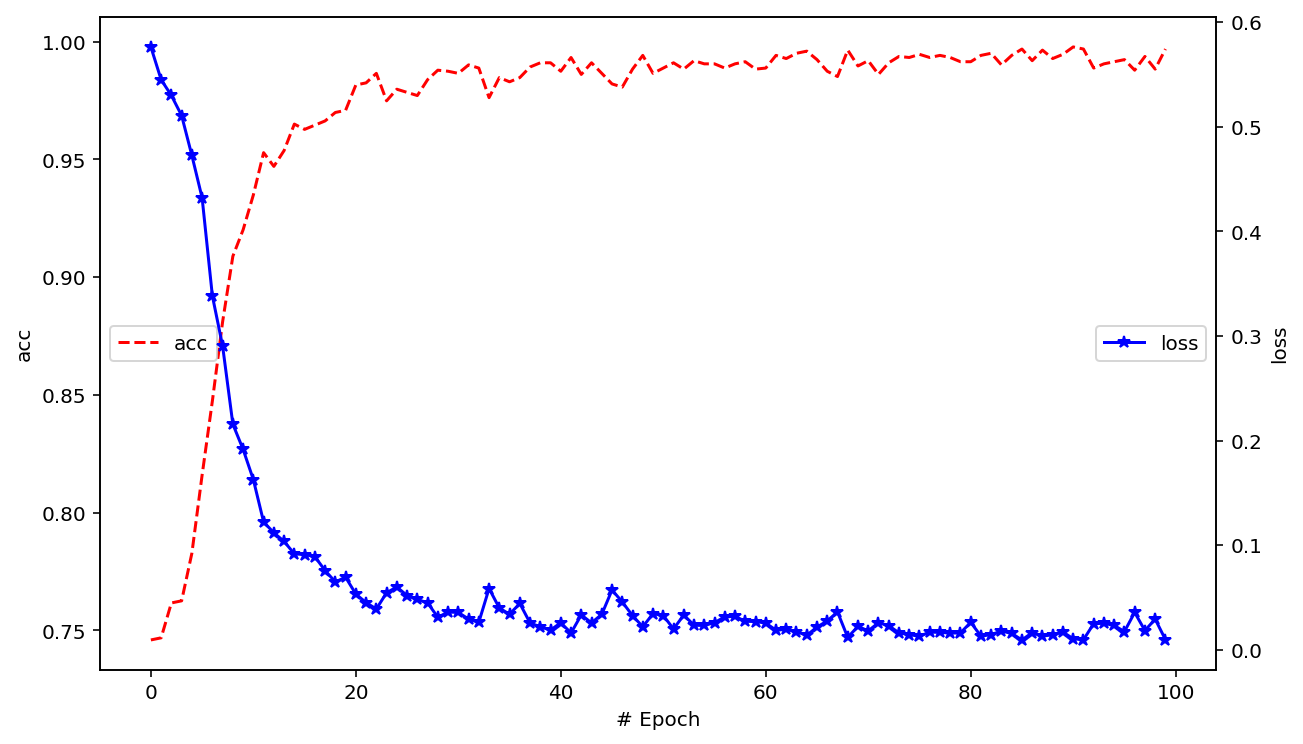

In [ ]:
def plot_loss_metric(model,metric='acc',loss='loss'):
    fig, ax1 = plt.subplots()
    ax1.plot(model.history.history[metric],'r--',label=metric,axes=ax1)
    ax1.set_xlabel('# Epoch')
    ax1.set_ylabel(metric)
    ax1.legend(loc='center left')
    ax2 = ax1.twinx()
    ax2.plot(model.history.history[loss],'b*-',label='loss',axes=ax2,)
    ax2.set_ylabel(loss)
    ax2.legend(loc='center right');
    
plot_loss_metric(model)

In [ ]:
model.history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

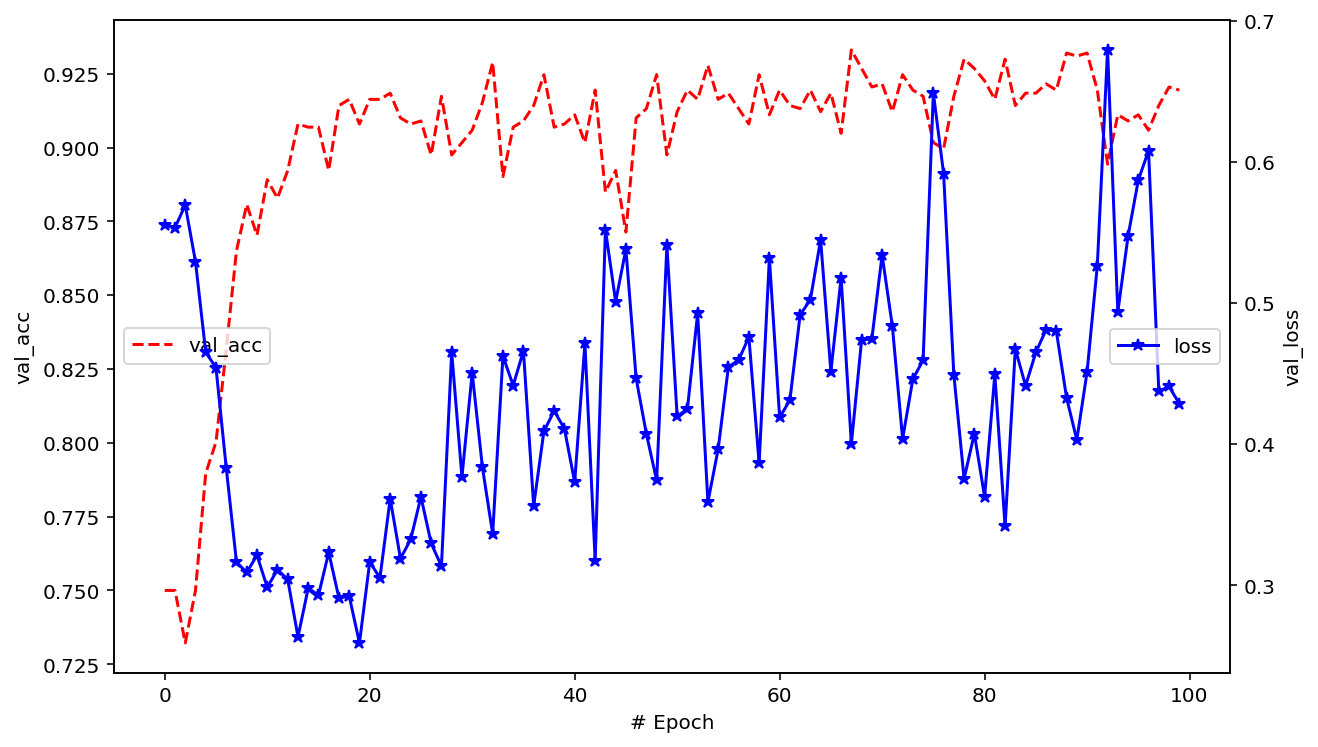

In [ ]:
plot_loss_metric(model,'val_acc','val_loss')

In [ ]:
%%capture
!pip install scikit-plot
import scikitplot as skplt

In [ ]:
model.save('BILLETES-CNN2.h5')

In [ ]:
preds = model.predict(X) 
y_pred = pd.get_dummies(y).columns[np.argmax(preds,1) ].values

In [ ]:
np.mean([a==b for a,b in zip(y,y_pred)])

0.9510050251256281

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred, target_names=CATEGORIES))

              precision    recall  f1-score   support

          10       0.97      0.95      0.96       200
          20       0.91      0.95      0.93       222
          50       0.96      0.97      0.96       185
         100       0.97      0.94      0.95       189

    accuracy                           0.95       796
   macro avg       0.95      0.95      0.95       796
weighted avg       0.95      0.95      0.95       796



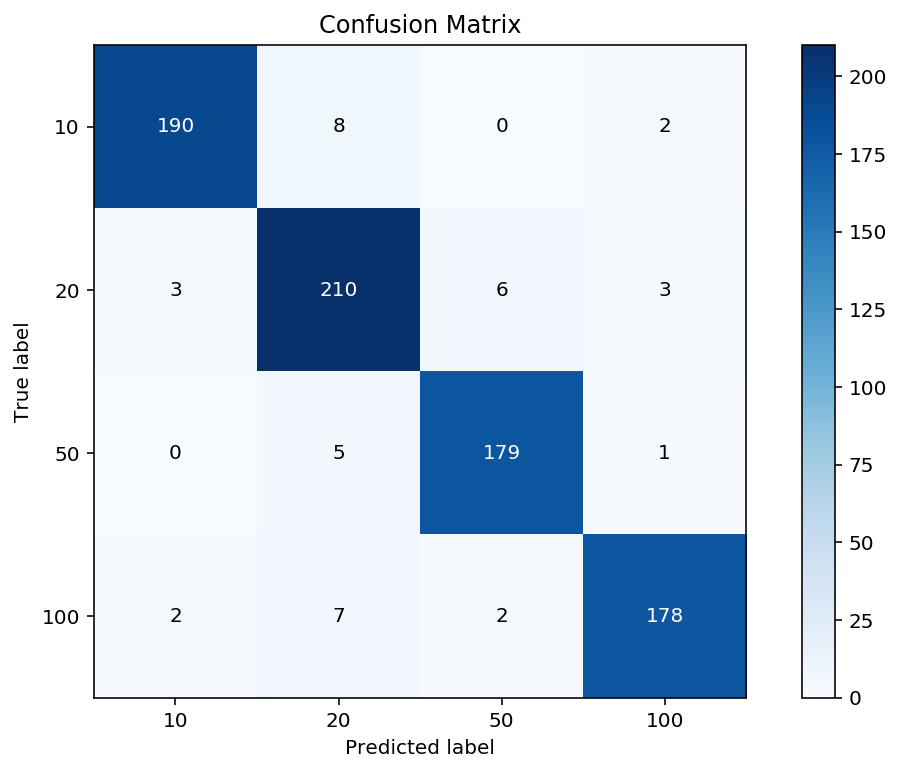

In [ ]:
skplt.metrics.plot_confusion_matrix(y_true=y, y_pred=y_pred,)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


[]

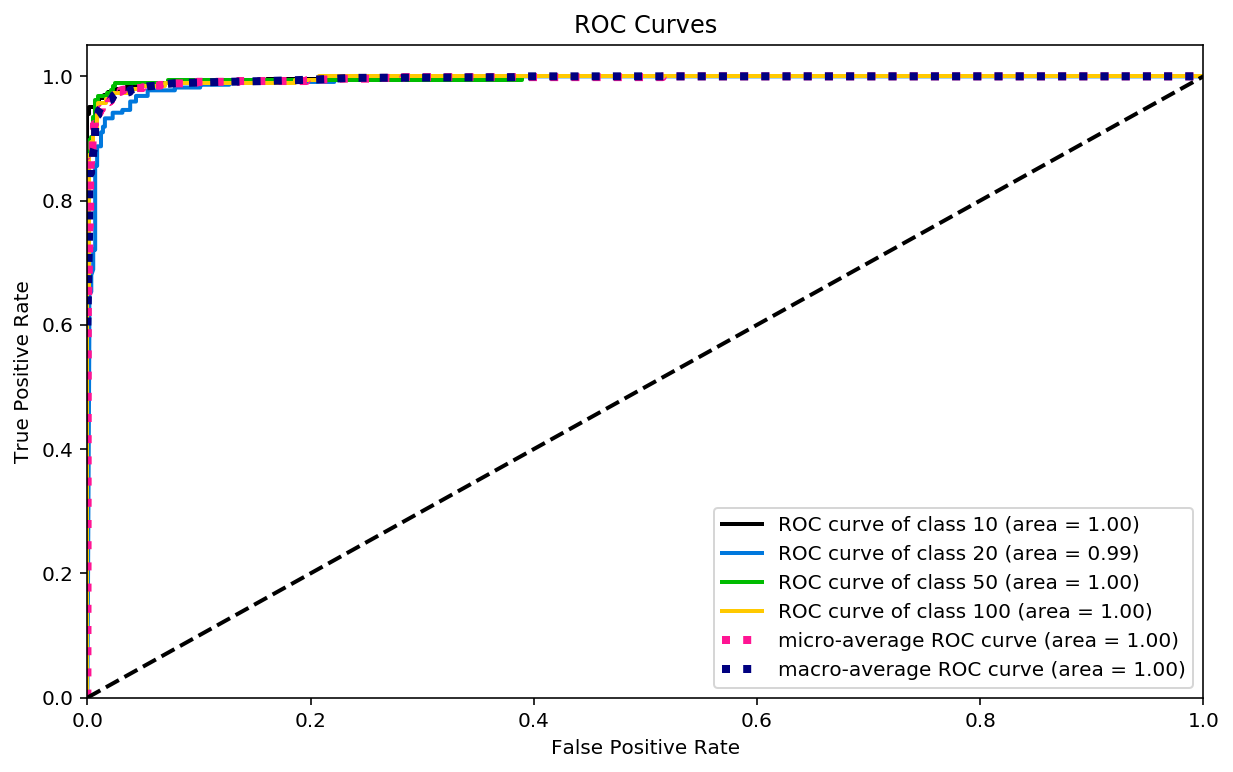

In [ ]:
probas = model.predict_proba(X)
skplt.metrics.plot_roc_curve(y_true=y, y_probas=probas,)
plt.plot()

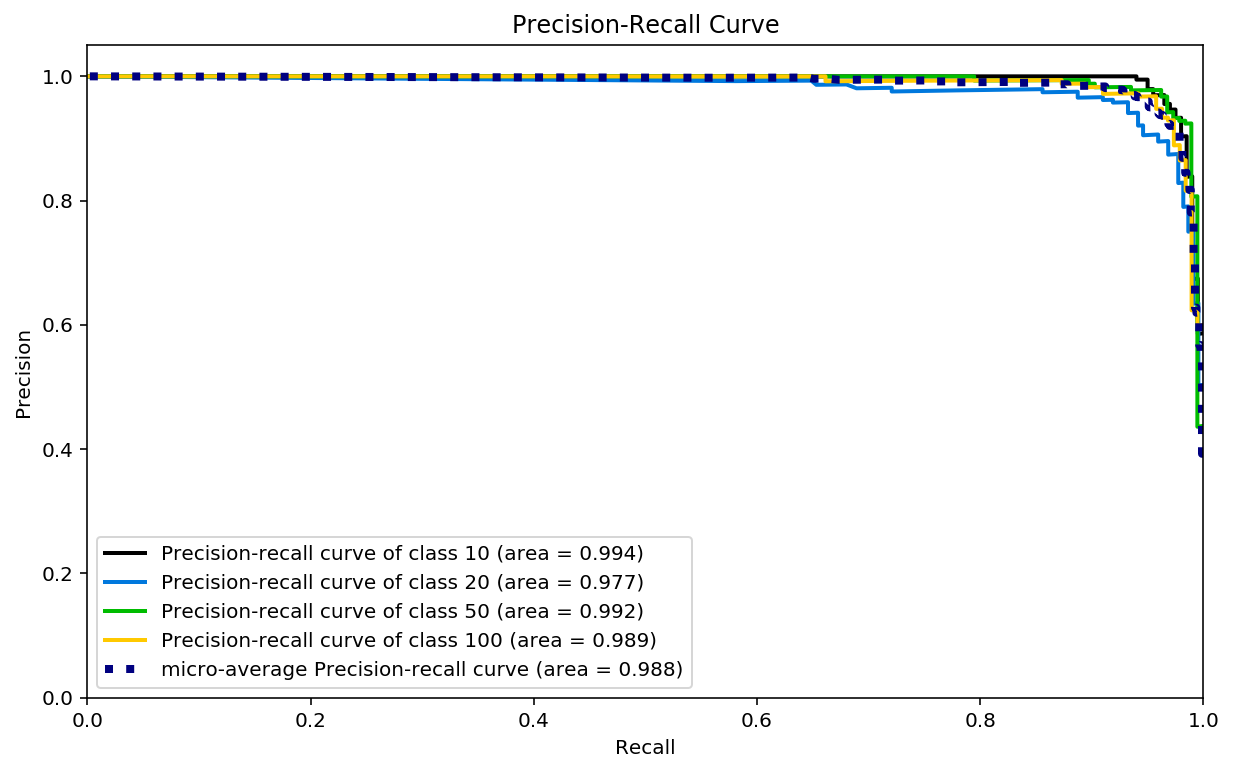

In [ ]:
skplt.metrics.plot_precision_recall(y_true=y, y_probas=probas)
plt.show()

# Testing

In [ ]:
# def prepare(filepath):
#     img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
#     new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
#     return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# y_test = ['50','10','100']
# val=np.vstack([prepare('P9030007.JPG'),prepare('P9030033.JPG'),prepare('P9030111.JPG'),])
# preds_test = model.predict(val) 
# y_result = [CATEGORIES[i] for i in np.argmax(preds_test,1)]

# Transfer Learning

In [ ]:
training_data = []
IMG_SIZE = 192

def create_training_data():
    for filename in os.listdir(DATADIR): 
        class_num = int(filename[filename.find('_')+1:filename.rfind('_')])
        # print(filename,class_num)
        try:
            img_array = cv2.imread(os.path.join(DATADIR,filename) )
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            training_data.append([new_array, class_num])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
        except OSError as e:
            print("OSErrroBad img most likely", e, os.path.join(path,img))
        except Exception as e:
            print("general exception", e, os.path.join(path,img))

create_training_data()
print(len(training_data))

796


In [ ]:
random.shuffle(training_data)
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
print(X.shape)

X = X/255.0

(796, 192, 192, 3)


In [ ]:
pd.Series(y).value_counts(normalize=True)

20     0.278894
10     0.251256
100    0.237437
50     0.232412
dtype: float64

## MobileNetv2

In [ ]:
IMAGE_SIZE = [IMG_SIZE, IMG_SIZE]
pretrained_model = tf.keras.applications.MobileNetV2(input_shape=[*IMAGE_SIZE, 3], include_top=False)
pretrained_model.trainable = False

model = tf.keras.Sequential([
    pretrained_model, tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='softmax')
])

9412608/9406464 [==============================] - 1s 0us/step


In [ ]:
model.compile( optimizer=tf.train.AdamOptimizer(), loss = 'categorical_crossentropy', metrics=['categorical_accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_192 (Model) (None, 6, 6, 1280)        2257984   
_________________________________________________________________
flatten_3 (Flatten)          (None, 46080)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 184324    
Total params: 2,442,308
Trainable params: 184,324
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
y[:3]

[10, 10, 10]

In [ ]:
y_hat = pd.get_dummies(y)
y_hat[:1]

,10,20,50,100
0,1,0,0,0


In [ ]:
history = model.fit(X, y_hat,  batch_size=16, epochs=300, validation_split=0.3,verbose=0)

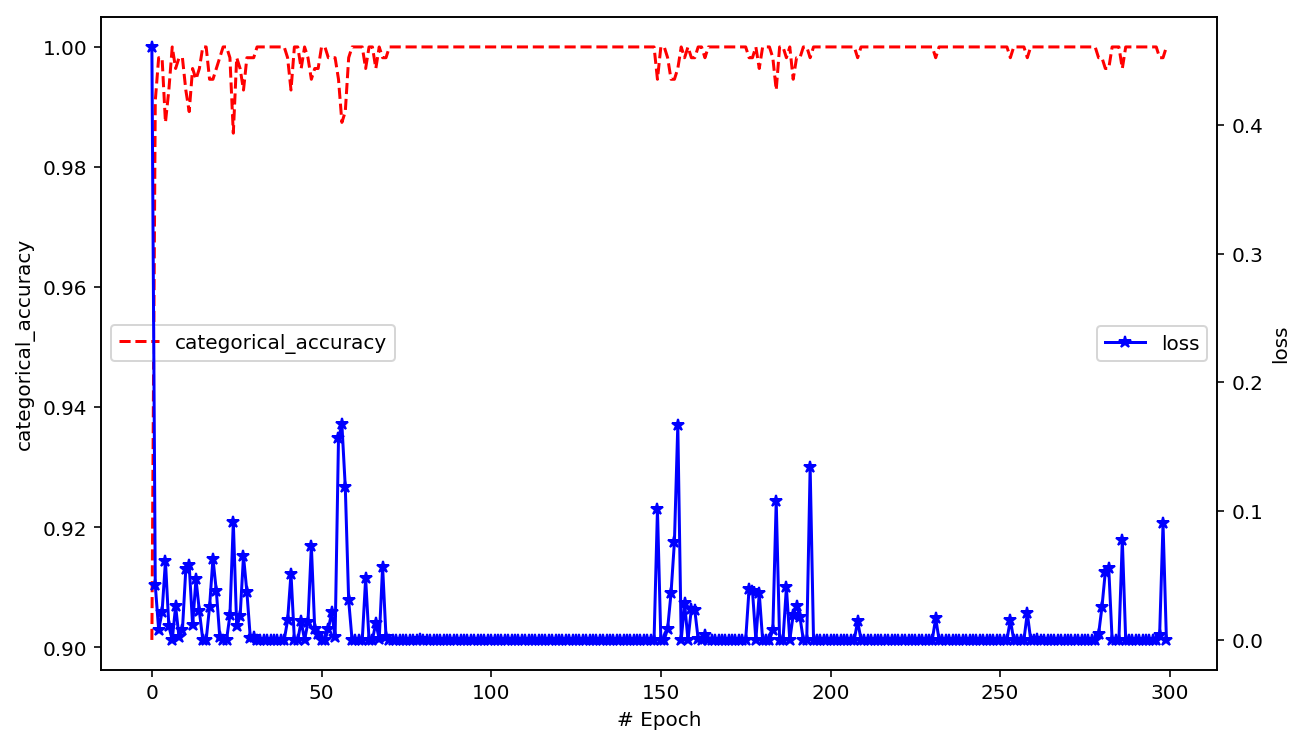

In [ ]:
plot_loss_metric(model,'categorical_accuracy')

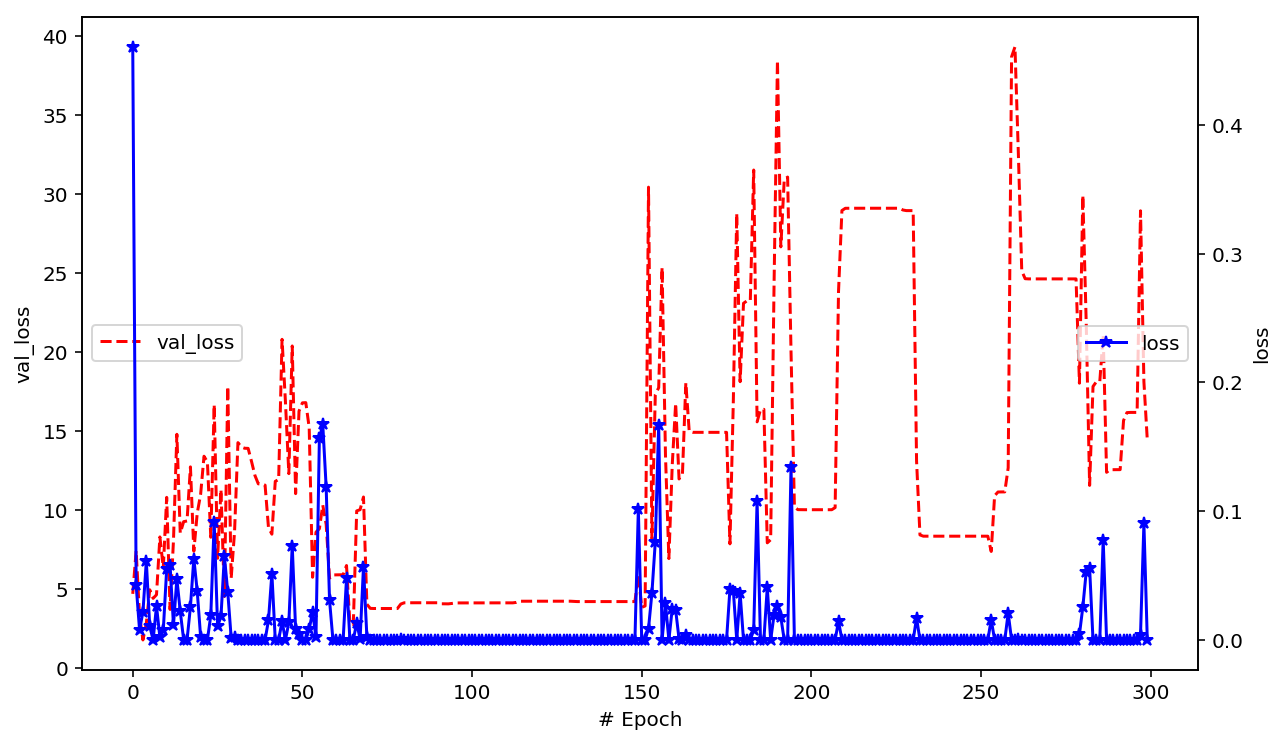

In [ ]:
plot_loss_metric(model,'val_loss')

In [ ]:
model.evaluate(X,y_hat)

796/796 [==============================] - 2s 3ms/sample - loss: 12.5709 - categorical_accuracy: 0.6972


[12.570865664649848, 0.6972362]

In [ ]:
from tensorflow.keras.utils import to_categorical
model = tf.keras.Sequential([
    pretrained_model, tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.compile( optimizer='rmsprop', loss = 'categorical_crossentropy', metrics=['categorical_accuracy'])
history = model.fit(X, y_hat,  batch_size=16, epochs=100, validation_split=0.3,verbose=0)
model.evaluate(X,y_hat)

796/796 [==============================] - 2s 2ms/sample - loss: 3.2504 - categorical_accuracy: 0.7136


[3.2504455078786343, 0.71356785]

In [ ]:
preds = model.predict(X) 
y_pred = y_hat.columns[np.argmax(preds,1) ].values

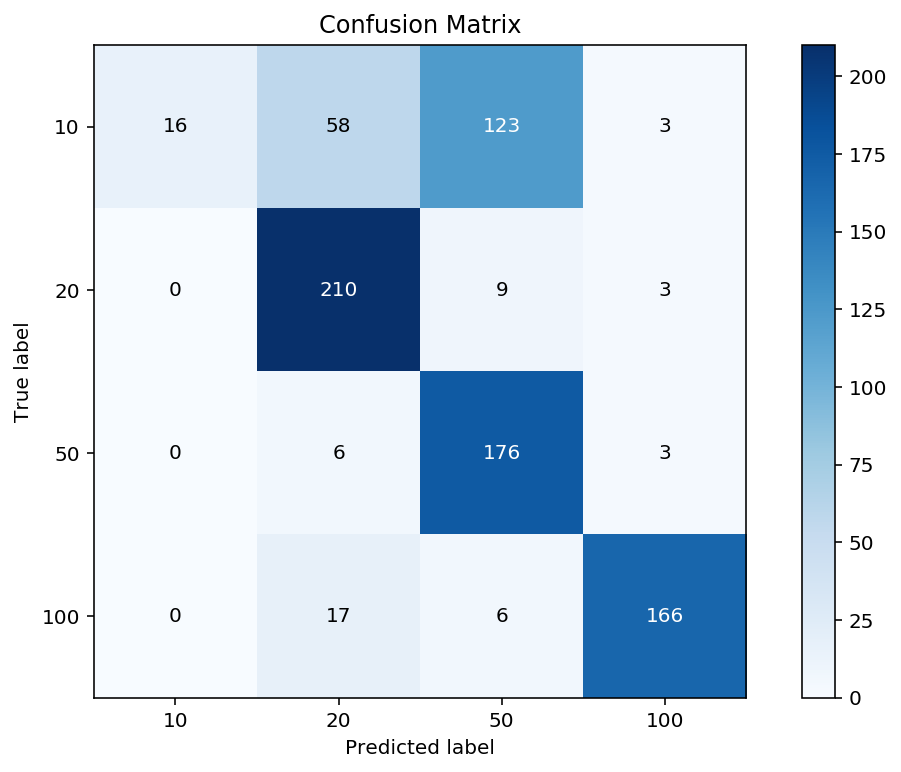

In [ ]:
skplt.metrics.plot_confusion_matrix(y_true=y, y_pred=y_pred)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


[]

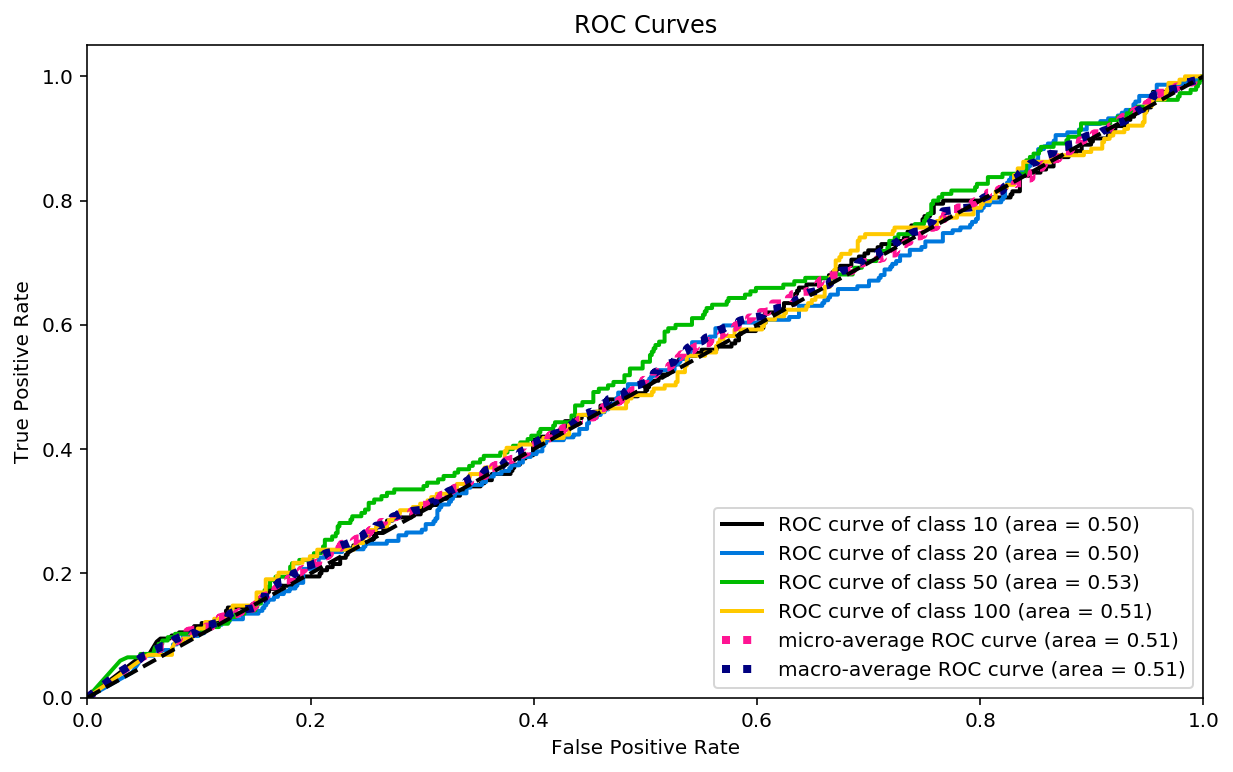

In [ ]:
aprobas = model.predict_proba(X)
skplt.metrics.plot_roc_curve(y_true=y, y_probas=probas)
plt.plot()

## VGG16

In [ ]:
pretrained_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False ,input_shape=[*IMAGE_SIZE, 3])
pretrained_model.trainable = False
model = tf.keras.Sequential([
    pretrained_model, tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.compile( optimizer=tf.train.AdamOptimizer(), loss = 'categorical_crossentropy', metrics=['accuracy',])
model.summary()

58892288/58889256 [==============================] - 3s 0us/step
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 6, 6, 512)         14714688  
_________________________________________________________________
flatten_11 (Flatten)         (None, 18432)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 73732     
Total params: 14,788,420
Trainable params: 73,732
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
history = model.fit(X, y_hat, batch_size=16, epochs=100, validation_split=0.3, verbose=0,)

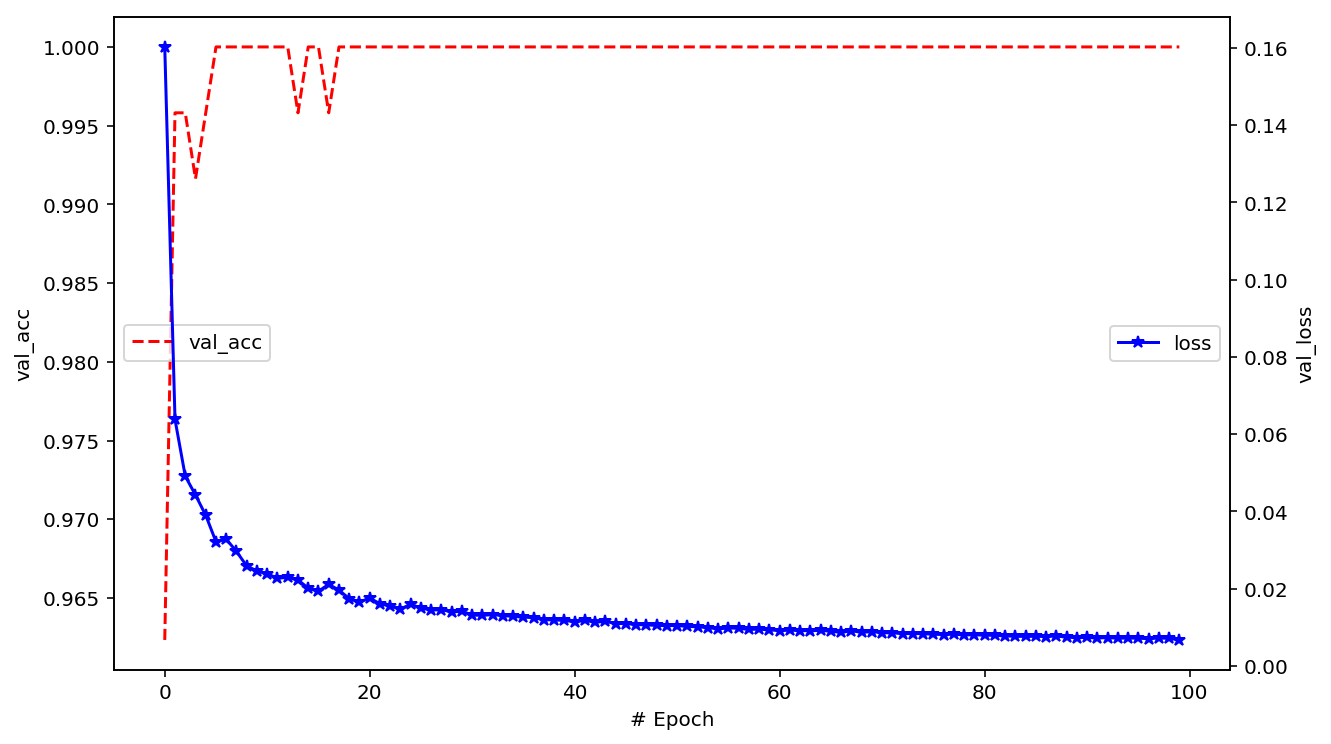

In [ ]:
plot_loss_metric(model,'val_acc','val_loss')

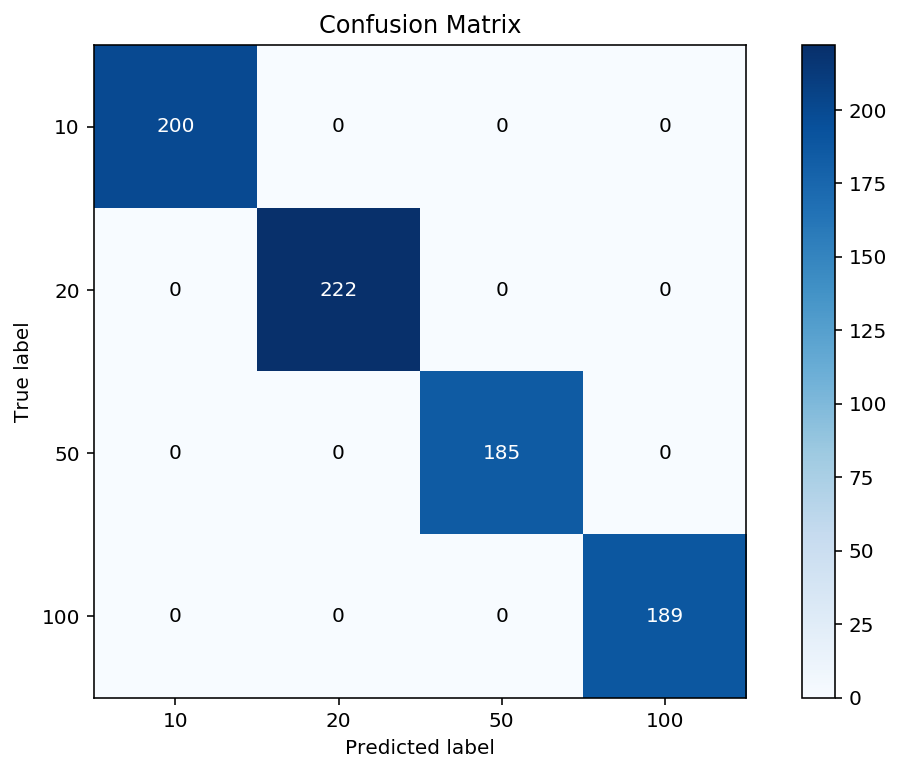

In [ ]:
preds = model.predict(X) 
y_pred = y_hat.columns[np.argmax(preds,1) ].values
skplt.metrics.plot_confusion_matrix(y_true=y, y_pred=y_pred)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


[]

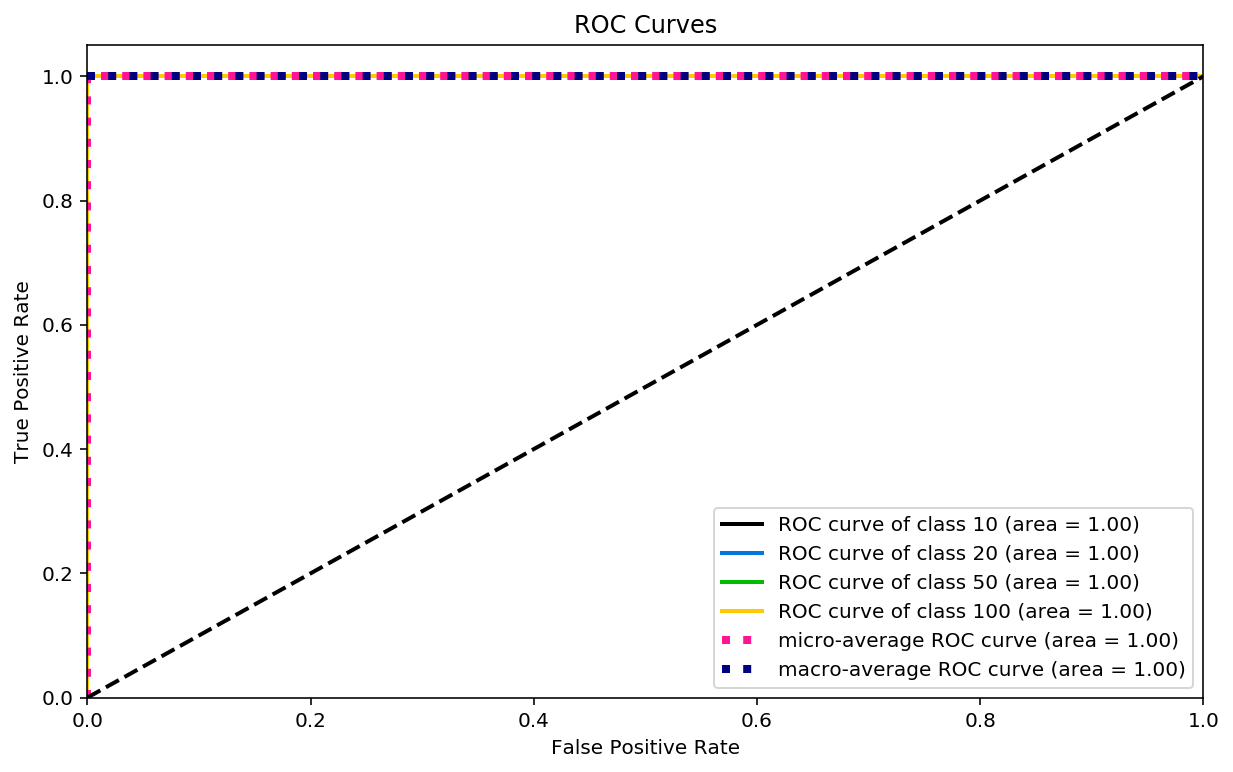

In [ ]:
probas = model.predict_proba(X)
skplt.metrics.plot_roc_curve(y_true=y, y_probas=probas)
plt.plot()

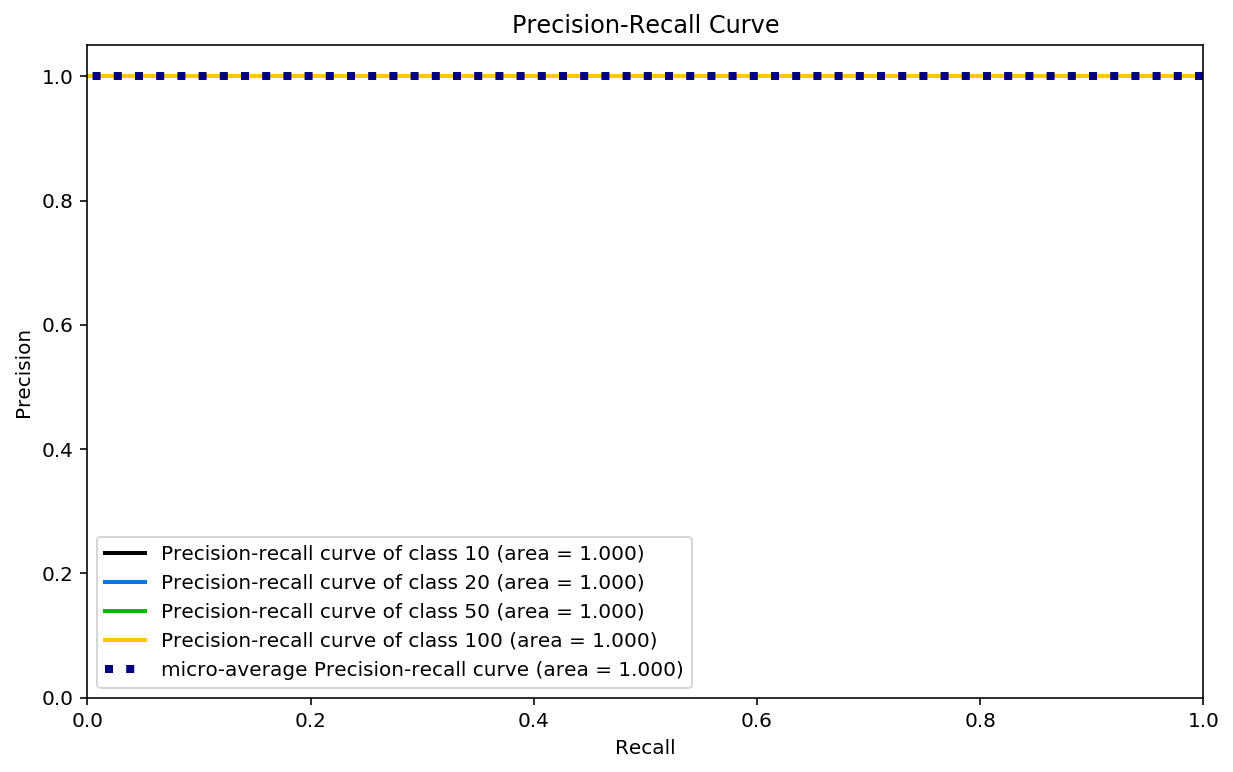

In [ ]:
skplt.metrics.plot_precision_recall(y_true=y, y_probas=probas)
plt.show()

## ResNet50

In [ ]:
pretrained_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=[*IMAGE_SIZE, 3])
pretrained_model.trainable = False
model = tf.keras.Sequential([
    pretrained_model, tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.compile( optimizer=tf.train.AdamOptimizer(), loss = 'categorical_crossentropy', metrics=['accuracy',])
model.summary()

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 3s 0us/step
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 6, 6, 2048)        23587712  
_________________________________________________________________
flatten_12 (Flatten)         (None, 73728)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 294916    
Total params: 23,882,628
Trainable params: 294,916
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
history = model.fit(X, y_hat, batch_size=16, epochs=100, validation_split=0.3, verbose=0,)

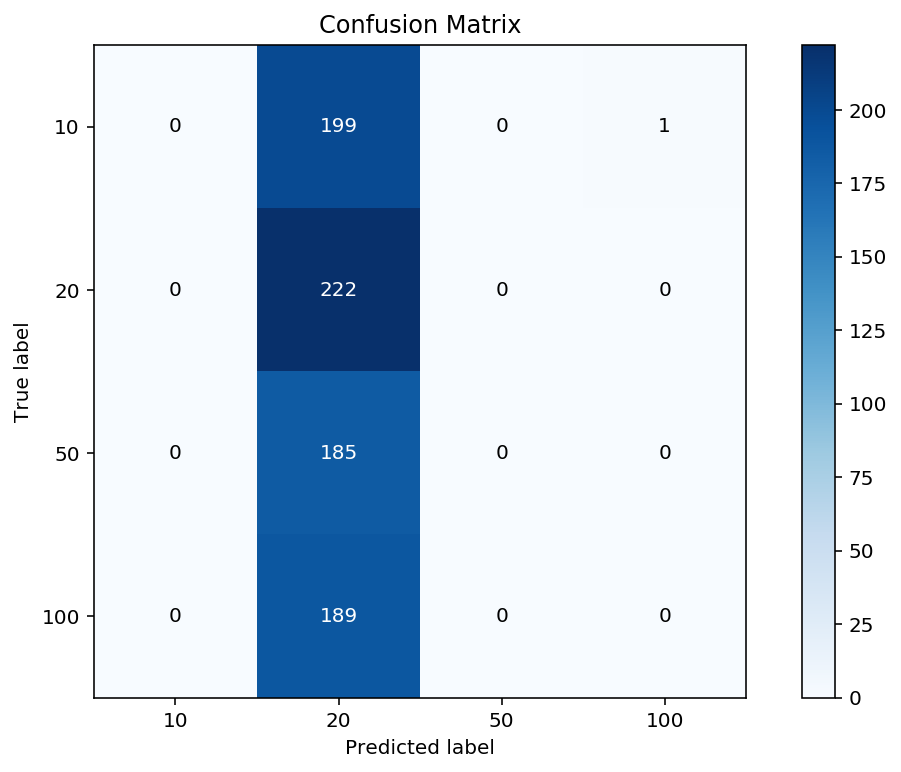

In [ ]:
preds = model.predict(X) 
y_pred = pd.get_dummies(y).columns[np.argmax(preds,1) ].values

skplt.metrics.plot_confusion_matrix(y_true=y, y_pred=y_pred)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


[]

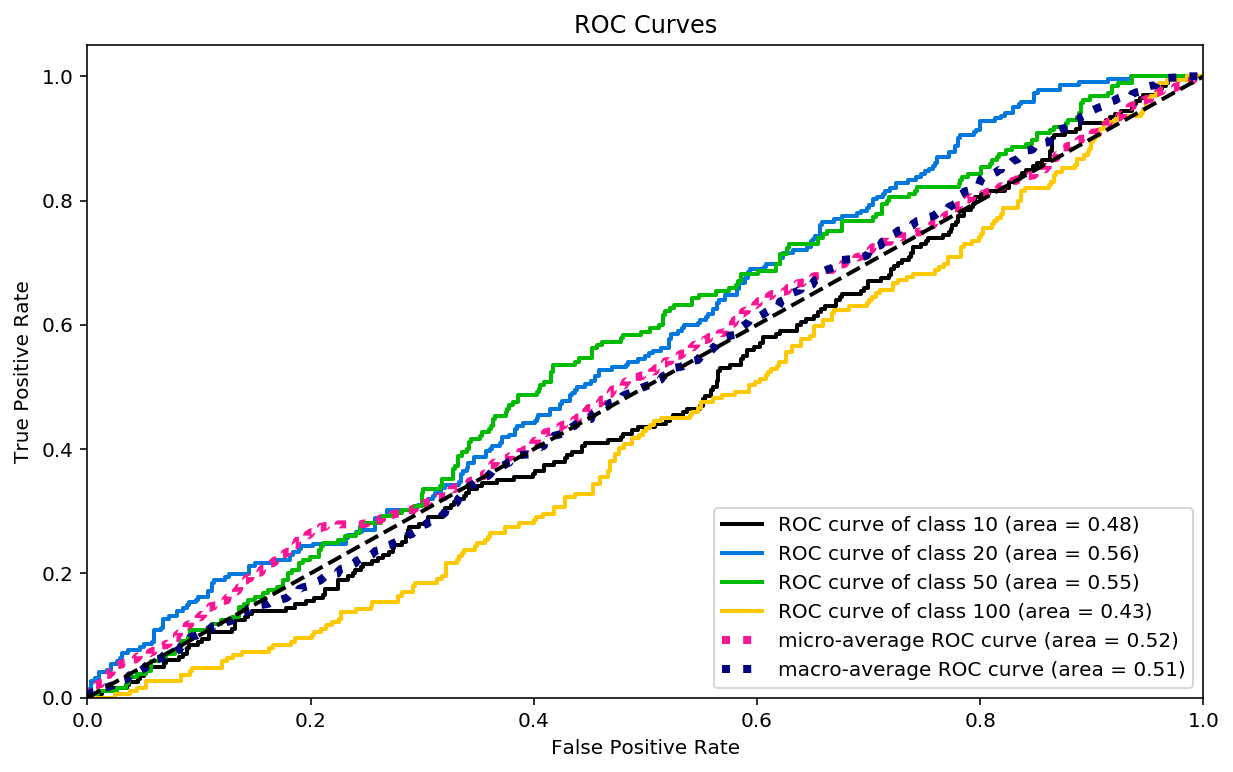

In [ ]:
probas = model.predict_proba(X)
skplt.metrics.plot_roc_curve(y_true=y, y_probas=probas)
plt.plot()

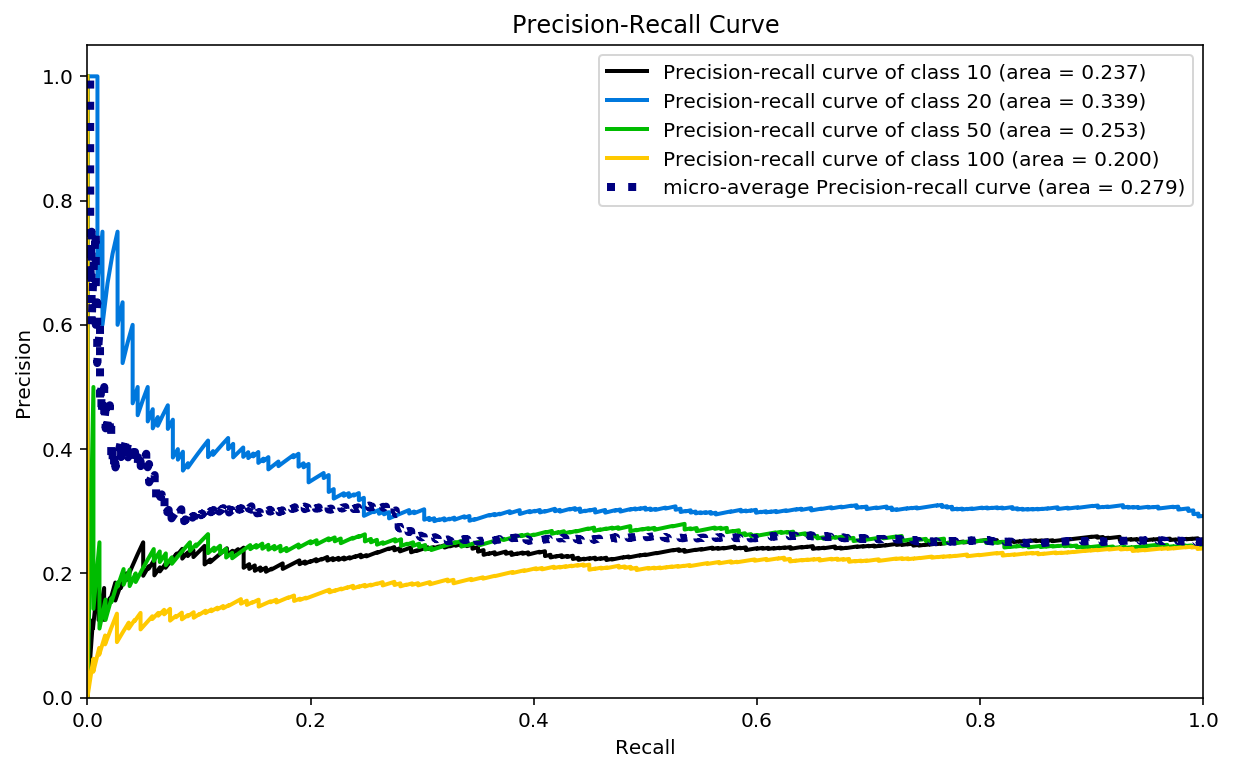

In [ ]:
skplt.metrics.plot_precision_recall(y_true=y, y_probas=probas)
plt.show()

## MobileNet

In [ ]:
pretrained_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=[*IMAGE_SIZE, 3])
pretrained_model.trainable = False
model = tf.keras.Sequential([
    pretrained_model, tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.compile( optimizer=tf.train.AdamOptimizer(), loss = 'categorical_crossentropy', metrics=['accuracy',])
model.summary()

17227776/17225924 [==============================] - 1s 0us/step
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_192 (Model)   (None, 6, 6, 1024)        3228864   
_________________________________________________________________
flatten_13 (Flatten)         (None, 36864)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 147460    
Total params: 3,376,324
Trainable params: 147,460
Non-trainable params: 3,228,864
_________________________________________________________________


In [ ]:
history = model.fit(X, y_hat, batch_size=16, epochs=100, validation_split=0.3, verbose=0,)

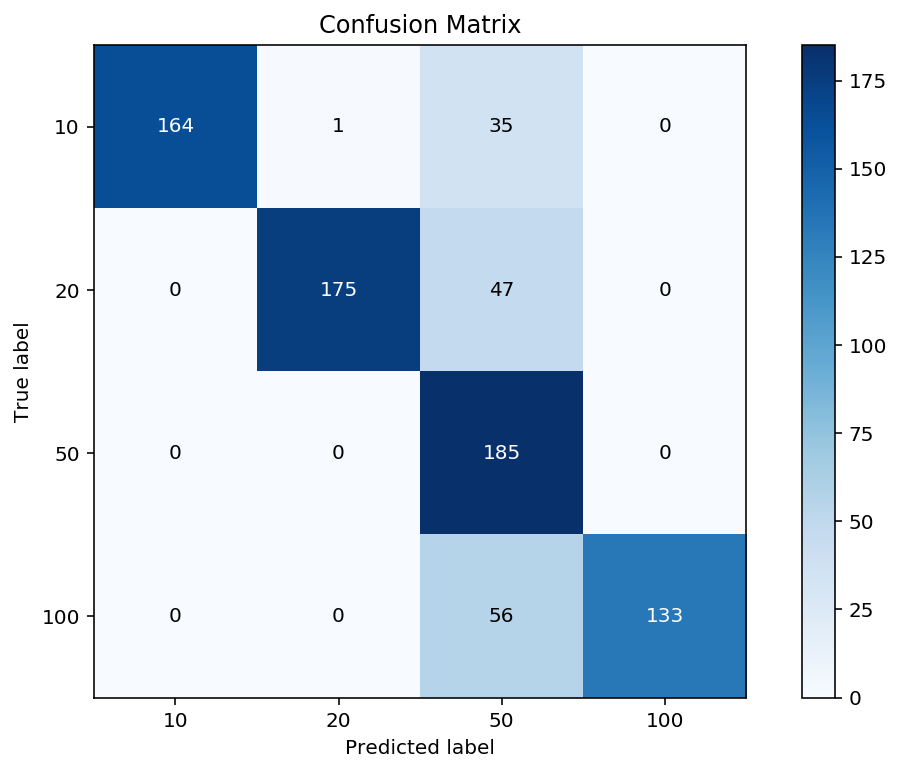

In [ ]:
preds = model.predict(X) 
y_pred = pd.get_dummies(y).columns[np.argmax(preds,1) ].values

skplt.metrics.plot_confusion_matrix(y_true=y, y_pred=y_pred)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


[]

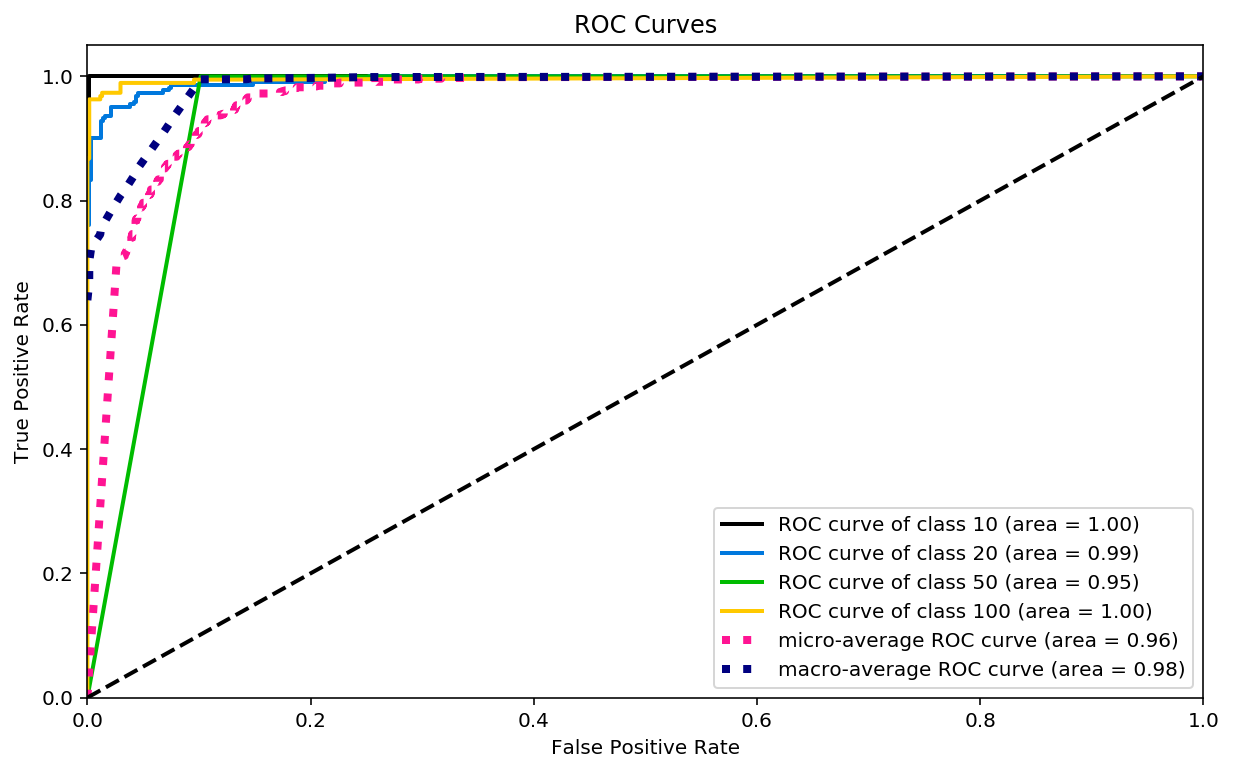

In [ ]:
probas = model.predict_proba(X)
skplt.metrics.plot_roc_curve(y_true=y, y_probas=probas)
plt.plot()

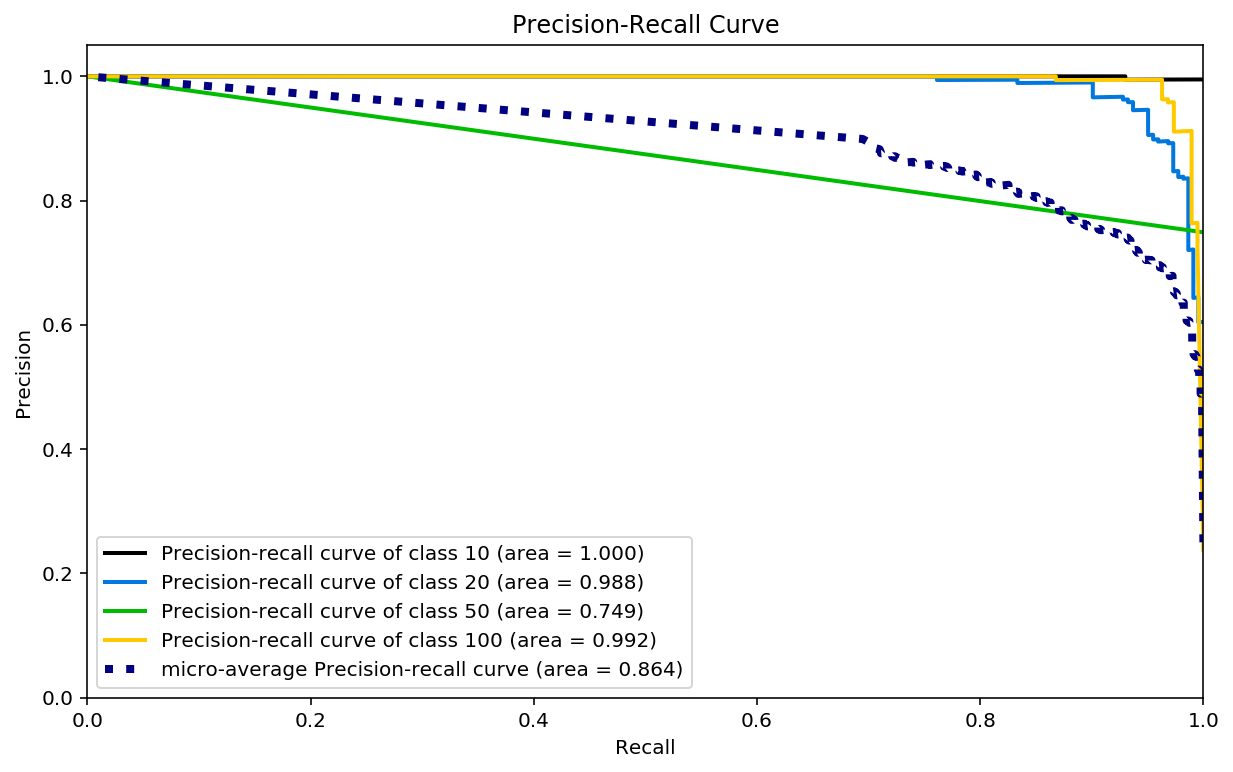

In [ ]:
skplt.metrics.plot_precision_recall(y_true=y, y_probas=probas)
plt.show()

## In Fact

# MultiLogistic

In [ ]:
print(X.shape)
X_flat = X.reshape(X.shape[0],-1)
print(X_flat.shape)

(796, 100, 100, 1)
(796, 10000)


In [ ]:
y_flat = np.array(y).reshape(-1,1)
print(y_flat.shape)

(796, 1)


In [ ]:
y_flat = y_flat.astype(str)

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X_flat, y_flat, test_size=0.2, random_state=0)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV

np.random.seed(45)
fold = KFold( n_splits=5)

In [ ]:
%%capture
solver_options = ['newton-cg', 'lbfgs', 'sag']
multi_class_options = ['ovr', 'multinomial']
# class_weight_options = [None, 'balanced']
C_param_range = np.power(10.0, np.arange(-10, 10))
param_grid = dict(C=C_param_range, solver = solver_options, multi_class =  multi_class_options)

clf = LogisticRegression( max_iter=10000,multi_class='multinomial')  
gs = GridSearchCV(clf, param_grid, cv=fold, scoring = 'accuracy',verbose=0)
gs.fit(X_train, y_train)

In [ ]:
gs.best_score_

0.720125786163522

In [ ]:
print ('gs.best_score_:', gs.best_params_)

gs.best_score_: {'C': 100, 'multi_class': 'ovr', 'solver': 'newton-cg'}


In [ ]:
gs.score(X_test,y_test)

0.725

In [ ]:
import smtplib
server = smtplib.SMTP('smtp.gmail.com', 587)
server.starttls()
server.login("yostin.derefe@gmail.com", "123qweAS")
msg = "Subject: \'{}\' task has finished \n\n{}\n\n{}".format("MODEL RCNN","COLAB WORK FINISH ALERT!",gs.best_params_)
server.sendmail("yostin.derefe@gmail.com", "romllz489@gmail.com", msg)
server.quit()

(221, b'2.0.0 closing connection k5sm7145589pfp.109 - gsmtp')

# Testing new Recognize

In [ ]:
model = gs.best_estimator_
model

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.score(X_flat, y_flat),model.score(X_train, y_train),model.score(X_test, y_test)

(0.9447236180904522, 1.0, 0.725)

In [ ]:
from sklearn.externals import joblib
filename_model = 'peru_bills_LogisticRegression_multi_class.pickle'
joblib.dump(model, filename_model)

['peru_bills_LogisticRegression_multi_class.sav']

In [ ]:
# Run 2 times
from google.colab import files
files.download(filename_model)

In [ ]:
loaded_model = joblib.load(filename_model)
result = loaded_model.score(X_flat, y_flat)
print(result)

0.9447236180904522


In [ ]:
from sklearn.metrics import classification_report
y_pred = loaded_model.predict(X_flat)
print(classification_report(y_flat, y_pred, target_names=CATEGORIES))

              precision    recall  f1-score   support

          10       0.95      0.97      0.96       200
          20       0.95      0.91      0.93       189
          50       0.94      0.94      0.94       222
         100       0.95      0.95      0.95       185

    accuracy                           0.94       796
   macro avg       0.94      0.94      0.94       796
weighted avg       0.94      0.94      0.94       796



In [ ]:
import pandas as pd
df = pd.DataFrame(columns=['class','class_pred'])
for filename in os.listdir(DATADIR)[::1]: 
    class_num = int(filename[filename.find('_')+1:filename.rfind('_')])
    img_array = cv2.imread(os.path.join(DATADIR,filename) ,cv2.IMREAD_GRAYSCALE)  
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    standarize_array = new_array/255.0
    pred = loaded_model.predict(standarize_array.reshape(1,-1))[0]
    df = df.append(pd.Series([class_num,pred],index=df.columns) , ignore_index=True)

In [ ]:
df.dtypes

class         object
class_pred    object
dtype: object

In [ ]:
print(type(df.loc[0]['class']),type(df.loc[0]['class_pred']))

<class 'int'> <class 'numpy.str_'>


In [ ]:
df[["class", "class_pred"]] = df[["class", "class_pred"]].apply(pd.to_numeric)

In [ ]:
print(type(df.loc[0]['class']),type(df.loc[0]['class_pred']))

<class 'numpy.int64'> <class 'numpy.int64'>


In [ ]:
df.columns =[column.replace(" ", "_") for column in df.columns] 

In [ ]:
df.apply(lambda x: x['class']==x['class_pred'],axis=1).mean()

0.9447236180904522

In [ ]:
# df

In [ ]:
with open('{}.pickle'.format(filename_model[:-4]), 'wb') as handle:
    pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
with open('{}.pickle'.format(filename_model[:-4]), 'rb') as handle:
    loaded_model_2 = pickle.load(handle)
print(loaded_model_2)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
result = loaded_model_2.score(X_flat, y_flat)
print(result)

0.9447236180904522


In [ ]:
probas = model.predict_proba(X_flat)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


[]

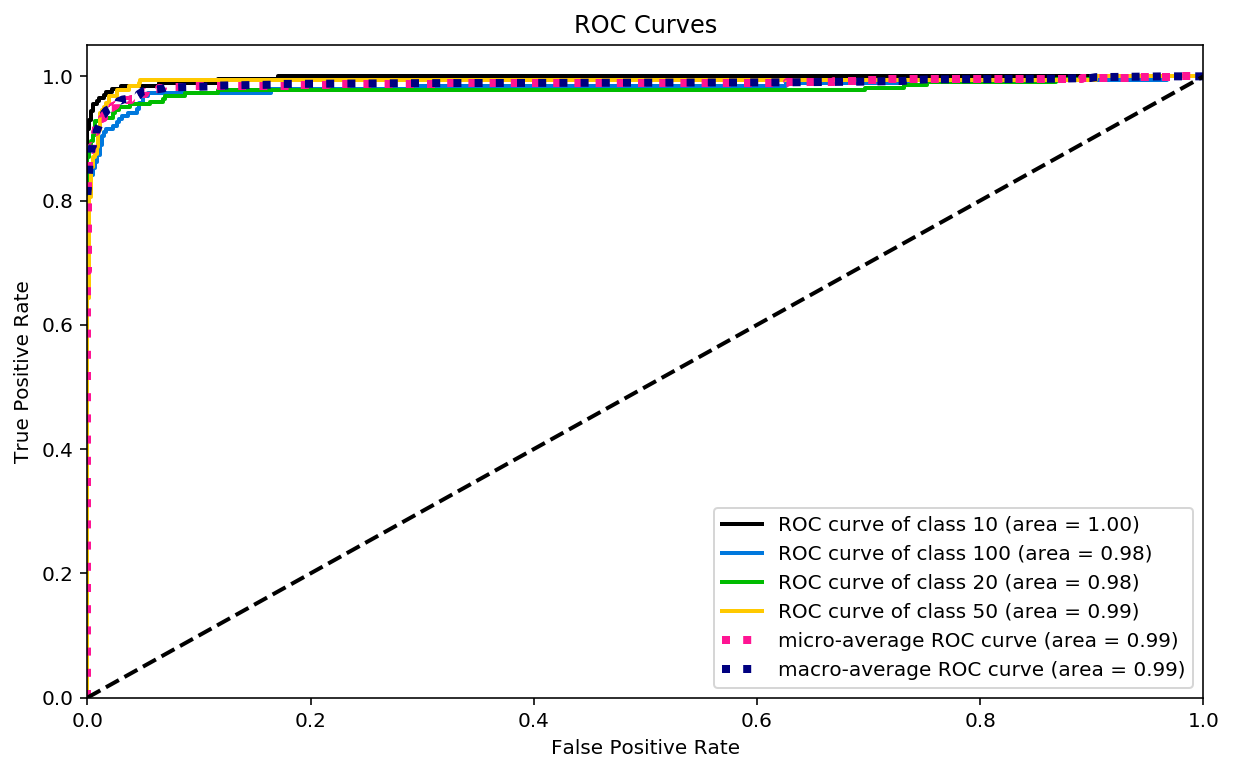

In [ ]:
skplt.metrics.plot_roc_curve(y_true=y_flat, y_probas=probas)
plt.plot()

[]

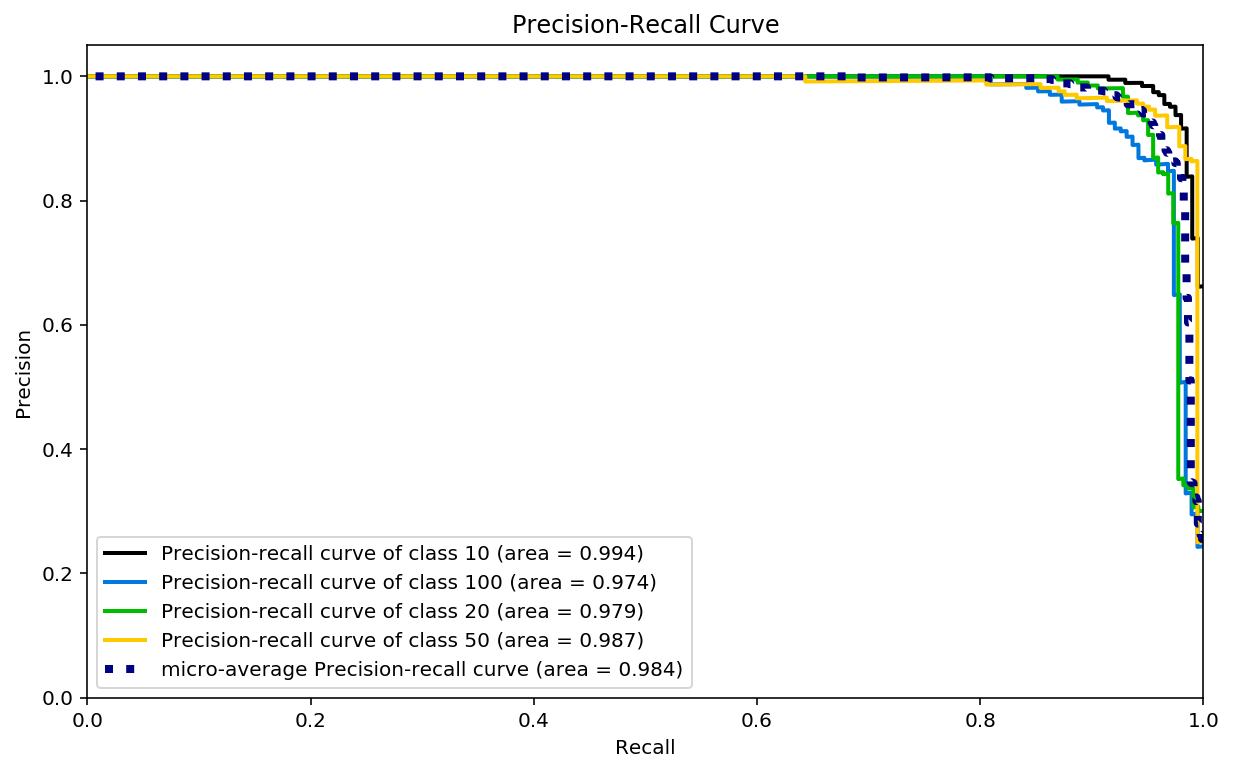

In [ ]:
skplt.metrics.plot_precision_recall(y_true=y_flat, y_probas=probas)
plt.plot()